# Machine Learning with PyTorch and Scikit-Learn  
# -- Code Examples

## Package version checks

Add folder to path in order to load from the check_packages.py script:

In [3]:
import sys
sys.path.insert(0, '..')

Check recommended package versions:

In [4]:
import torch


print(torch.__version__)
print("GPU Available:", torch.cuda.is_available())

if torch.cuda.is_available():
    device = torch.device("cuda:0")
else:
    device = "cpu"

2.0.1
GPU Available: False


In [5]:
import torch.nn as nn
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## Train the DCGAN model

In [6]:
import torchvision
from torchvision import transforms


image_path = './'
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5), std=(0.5))
])
mnist_dataset = torchvision.datasets.MNIST(root=image_path,
                                           train=True,
                                           transform=transform,
                                           download=True)

batch_size = 64

torch.manual_seed(1)
np.random.seed(1)

## Set up the dataset
from torch.utils.data import DataLoader
mnist_dl = DataLoader(mnist_dataset, batch_size=batch_size,
                      shuffle=True, drop_last=True)


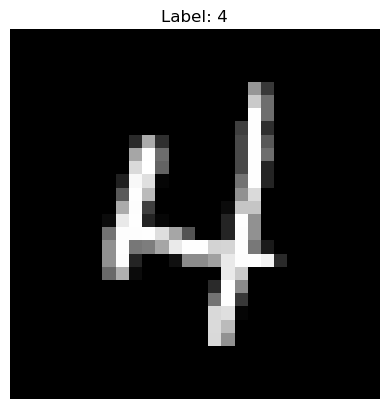

In [7]:
import matplotlib.pyplot as plt

# Assuming you have a DataLoader 'data_loader' set up as in the previous examples

# Use a for loop to iterate through the DataLoader
for batch_idx, (images, labels) in enumerate(mnist_dl):
    if batch_idx == 0:
        # Extract the first image from the first batch
        first_image = images[0][0].numpy()  # Assuming grayscale images

        # Create a Matplotlib figure and axis
        fig, ax = plt.subplots()

        # Display the image on the axis
        ax.imshow(first_image, cmap='gray')

        # Optionally, you can add a title or other customizations
        ax.set_title(f"Label: {labels[0].item()}")
        ax.axis('off')  # Turn off axis labels and ticks

        # Show the plot
        plt.show()
    else:
        break  # Exit the loop after processing the first batch


In [8]:
z_size = 100
image_size = (28, 28)
n_filters = 32

In [9]:
## Loss function and optimizers:
loss_fn = nn.BCELoss()


In [10]:
def create_noise(batch_size, z_size, mode_z):
    if mode_z == 'uniform':
        input_z = torch.rand(batch_size, z_size, 1, 1)*2 - 1
    elif mode_z == 'normal':
        input_z = torch.randn(batch_size, z_size, 1, 1)
    return input_z

mode_z = 'uniform'
fixed_z = create_noise(batch_size, z_size, mode_z).to(device)

def create_samples(g_model, input_z):
    g_output = g_model(input_z)
    images = torch.reshape(g_output, (batch_size, *image_size))
    return (images+1)/2.0

In [11]:
noise = create_noise(64, 100, "uniform")

In [12]:
noise[63]

tensor([[[-0.4649]],

        [[ 0.9821]],

        [[ 0.6806]],

        [[-0.1813]],

        [[ 0.0300]],

        [[ 0.3185]],

        [[ 0.4067]],

        [[-0.8644]],

        [[-0.9831]],

        [[ 0.7897]],

        [[-0.7247]],

        [[-0.3738]],

        [[ 0.8620]],

        [[-0.2410]],

        [[ 0.8508]],

        [[-0.3005]],

        [[-0.1327]],

        [[-0.4997]],

        [[ 0.6467]],

        [[ 0.8523]],

        [[-0.7129]],

        [[-0.3407]],

        [[-0.2592]],

        [[ 0.4902]],

        [[-0.8490]],

        [[ 0.5275]],

        [[ 0.1656]],

        [[-0.0287]],

        [[ 0.7964]],

        [[ 0.4055]],

        [[-0.3786]],

        [[-0.2544]],

        [[ 0.0872]],

        [[ 0.3750]],

        [[ 0.1111]],

        [[-0.8907]],

        [[-0.1392]],

        [[-0.2259]],

        [[-0.4351]],

        [[-0.8971]],

        [[ 0.0421]],

        [[ 0.4082]],

        [[-0.9173]],

        [[-0.2362]],

        [[-0.2658]],

        [[

In [13]:


i1, l1 = next(iter(mnist_dl))
print(i1.shape, l1)

torch.Size([64, 1, 28, 28]) tensor([2, 3, 7, 9, 3, 9, 1, 3, 9, 3, 3, 5, 1, 9, 1, 5, 8, 1, 2, 2, 2, 8, 0, 4,
        6, 9, 2, 5, 1, 3, 1, 4, 6, 6, 7, 0, 5, 6, 0, 6, 9, 7, 8, 5, 2, 5, 5, 7,
        1, 6, 2, 9, 0, 5, 0, 8, 8, 7, 7, 2, 6, 5, 6, 9])


## Dissimilarity measures between two distributions

## Gradient penalty

## Implementing WGAN-GP to train the DCGAN model

In [14]:
def make_generator_network_wgan(input_size, n_filters):
    model = nn.Sequential(
        nn.ConvTranspose2d(input_size, n_filters*4, 4, 1, 0,
                           bias=False),
        nn.InstanceNorm2d(n_filters*4),
        nn.LeakyReLU(0.2),

        nn.ConvTranspose2d(n_filters*4, n_filters*2, 3, 2, 1, bias=False),
        nn.InstanceNorm2d(n_filters*2),
        nn.LeakyReLU(0.2),

        nn.ConvTranspose2d(n_filters*2, n_filters, 4, 2, 1, bias=False),
        nn.InstanceNorm2d(n_filters),
        nn.LeakyReLU(0.2),

        nn.ConvTranspose2d(n_filters, 1, 4, 2, 1, bias=False),
        nn.Tanh())
    return model

class DiscriminatorWGAN(nn.Module):
    def __init__(self, n_filters):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(1, n_filters, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2),

            nn.Conv2d(n_filters, n_filters*2, 4, 2, 1, bias=False),
            nn.InstanceNorm2d(n_filters * 2),
            nn.LeakyReLU(0.2),

            nn.Conv2d(n_filters*2, n_filters*4, 3, 2, 1, bias=False),
            nn.InstanceNorm2d(n_filters*4),
            nn.LeakyReLU(0.2),

            nn.Conv2d(n_filters*4, 1, 4, 1, 0, bias=False),
            nn.Sigmoid())

    def forward(self, input):
        output = self.network(input)
        return output.view(-1, 1).squeeze(0)

In [15]:
gen_model = make_generator_network_wgan(z_size, n_filters).to(device)
disc_model = DiscriminatorWGAN(n_filters).to(device)

g_optimizer = torch.optim.Adam(gen_model.parameters(), 0.0002)
d_optimizer = torch.optim.Adam(disc_model.parameters(), 0.0002)

In [16]:
from torch.autograd import grad as torch_grad


def gradient_penalty(real_data, generated_data):
    batch_size = real_data.size(0)

    # Calculate interpolation
    alpha = torch.rand(real_data.shape[0], 1, 1, 1, requires_grad=True, device=device)
    interpolated = alpha * real_data + (1 - alpha) * generated_data

    # Calculate probability of interpolated examples
    proba_interpolated = disc_model(interpolated)

    # Calculate gradients of probabilities with respect to examples
    gradients = torch_grad(outputs=proba_interpolated, inputs=interpolated,
                           grad_outputs=torch.ones(proba_interpolated.size(), device=device),
                           create_graph=True, retain_graph=True)[0]

    gradients = gradients.view(batch_size, -1)
    gradients_norm = gradients.norm(2, dim=1)
    return lambda_gp * ((gradients_norm - 1)**2).mean()


In [20]:
## Train the discriminator
def d_train_wgan(x):
    disc_model.zero_grad()

    batch_size = x.size(0)
    x = x.to(device)
    print("X", x.shape)

    # Calculate probabilities on real and generated data
    d_real = disc_model(x)
    print("D real", d_real.mean())
    input_z = create_noise(batch_size, z_size, mode_z).to(device)
    g_output = gen_model(input_z)
    print("G output", g_output.shape)
    d_generated = disc_model(g_output)
    print("D generated", d_generated.shape)
    d_loss = d_generated.mean() - d_real.mean() + gradient_penalty(x.data, g_output.data)
    d_loss.backward()
    d_optimizer.step()

    return d_loss.data.item()

In [21]:
## Train the generator
def g_train_wgan(x):
    gen_model.zero_grad()

    batch_size = x.size(0)
    input_z = create_noise(batch_size, z_size, mode_z).to(device)
    g_output = gen_model(input_z)

    d_generated = disc_model(g_output)
    g_loss = -d_generated.mean()

    # gradient backprop & optimize ONLY G's parameters
    g_loss.backward()
    g_optimizer.step()

    return g_loss.data.item()

In [22]:
epoch_samples_wgan = []
lambda_gp = 10.0
num_epochs = 100
torch.manual_seed(1)
critic_iterations = 5

for epoch in range(1, num_epochs+1):
    gen_model.train()
    d_losses, g_losses = [], []
    for i, (x, _) in enumerate(mnist_dl):
        for _ in range(critic_iterations):
            d_loss = d_train_wgan(x)
        d_losses.append(d_loss)
        g_losses.append(g_train_wgan(x))

    print(f'Epoch {epoch:03d} | D Loss >>'
          f' {torch.FloatTensor(d_losses).mean():.4f}')
    gen_model.eval()
    epoch_samples_wgan.append(
        create_samples(gen_model, fixed_z).detach().cpu().numpy())

G loss: tensor(-0.3837, grad_fn=<NegBackward0>)
G loss: tensor(-0.3242, grad_fn=<NegBackward0>)
G loss: tensor(-0.3431, grad_fn=<NegBackward0>)
G loss: tensor(-0.3712, grad_fn=<NegBackward0>)
G loss: tensor(-0.3411, grad_fn=<NegBackward0>)
G loss: tensor(-0.3737, grad_fn=<NegBackward0>)
G loss: tensor(-0.3200, grad_fn=<NegBackward0>)
G loss: tensor(-0.3184, grad_fn=<NegBackward0>)
G loss: tensor(-0.3455, grad_fn=<NegBackward0>)
G loss: tensor(-0.3095, grad_fn=<NegBackward0>)
G loss: tensor(-0.2968, grad_fn=<NegBackward0>)
G loss: tensor(-0.3204, grad_fn=<NegBackward0>)
G loss: tensor(-0.2938, grad_fn=<NegBackward0>)
G loss: tensor(-0.2980, grad_fn=<NegBackward0>)
G loss: tensor(-0.2867, grad_fn=<NegBackward0>)
G loss: tensor(-0.2948, grad_fn=<NegBackward0>)
G loss: tensor(-0.3067, grad_fn=<NegBackward0>)
G loss: tensor(-0.3023, grad_fn=<NegBackward0>)
G loss: tensor(-0.3711, grad_fn=<NegBackward0>)
G loss: tensor(-0.2966, grad_fn=<NegBackward0>)
G loss: tensor(-0.2749, grad_fn=<NegBack

KeyboardInterrupt: 

In [ ]:
selected_epochs = [1, 2, 4, 10, 50, 100]
# selected_epochs = [1, 10, 20, 30, 50, 70]
fig = plt.figure(figsize=(10, 14))
for i,e in enumerate(selected_epochs):
    for j in range(5):
        ax = fig.add_subplot(6, 5, i*5+j+1)
        ax.set_xticks([])
        ax.set_yticks([])
        if j == 0:
            ax.text(
                -0.06, 0.5, f'Epoch {e}',
                rotation=90, size=18, color='red',
                horizontalalignment='right',
                verticalalignment='center',
                transform=ax.transAxes)

        image = epoch_samples_wgan[e-1][j]
        ax.imshow(image, cmap='gray_r')

# plt.savefig('figures/ch17-wgan-gp-samples.pdf')
plt.show()


## Mode collapse

<br>
<br>

----



Readers may ignore the next cell.



In [ ]:
! python ../.convert_notebook_to_script.py --input ch17_part2.ipynb --output ch17_part2.py